## Load image and export non-overlapping rectangular regions (ROIs) to new image files

### IMPORTS
Requires cv2, numpy, matplotlib

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import re  # regular expressions

In [2]:
### OPTIONS

In [3]:
DEBUGGING          = False
doEXTERNALWINDOW   = False  # Don't make True if in GCP
doUSETESTIMAGERY   = False  # if False, use real images
doTESTCOLOR        = False
doMATPLOTLIBIMREAD = False

In [ ]:
homepath = "/home/jupyter/"
# inpath = homepath+"_IMAGERY/201004_MF_189_80_60_CB_S_1_360_64/"
inpath = homepath+"_IMAGERY/201004_MD_165_86.7_90_CB_S_1_1000_32"

# multiple files to process
#infn = "201004_MF_189_80_60_CB_S_1_360_64.1+1.tif"
# infn = "201004_MF_189_80_60_CB_S_1_360_64.2+1.tif"
infn = "201004_MF_189_80_60_CB_S_1_360_64.3+1.tif"
# infn = "201004_MF_189_80_60_CB_S_1_360_64.4+1.tif"
# infn = "201004_MF_189_80_60_CB_S_1_360_64.5+1.tif"
# infn = "201004_MF_189_80_60_CB_S_1_360_64.6+1.tif"

# actualpath = "_IMAGERY/201004_MF_189_80_60_CB_S_1_360_64/201004_MF_189_80_60_CB_S_1_360_64.6+1.tif"
# inpath= "_IMAGERY/201004_MF_189_80_60_CB_S_1_360_64/201004_MF_189_80_60_CB_S_1_360_64.6+1.tif"

infile = inpath+infn
print( infile )


outpath = inpath+"REGIONS/"
print( outpath )
#if !exists(outpath):
#    os.mkdir( outpath)
outfile = outpath+infn
print(outfile)

### Read the image

In [40]:
img = cv2.imread( infile )

### Image shape
Shape of image is accessed by img.shape. It returns a tuple of number of rows, columns, and channels (if image is color):

In [41]:
print(img.shape)

(23215, 14600, 3)


### Image size
Total number of pixels, from img.size

In [42]:
print(img.size)

1016817000


### Image datatype
Image datatype 

In [43]:
print(img.dtype)

uint8


### Display image using cv2.imshow (creates external window)
DON'T DO THIS IN A JUPYTER NOTEBOOK

In [44]:
# displaying image using cv2.imshow (creates external window)
# DON'T DO THIS IN A JUPYTER NOTEBOOK
if doEXTERNALWINDOW:
    cv2.imshow('image window for img', img )
    #add wait key. window waits till user press any key
    cv2.waitKey(0)

### Some recommend to destroy all windows, but this causes error:
cv2.destoyAllWindows()
AttributeError: module 'cv2' has no attribute 'destoyAllWindows'

### __________________________________________________________________
### Load and display image in the notebook using matplotlib
Use matplotlib instead of opencv to read and display the image

In [45]:
### Alternative: read the image in using matplotlib
if doMATPLOTLIBIMREAD:
    imgplt = plt.imread( infile )
    print(imgplt.shape)
    print(imgplt.dtype)
    plt.imshow(imgplt) # displays image in the next output cell of the jupyter notebook

### __________________________________________________________________
### Test iteration through image
Step through image by regions (ROIs, x,y blocks).
This will give you an idea how the code works, and demonstrate the process without saving the regions.

### __________________________________________________________________
## Export regions to images
This is the code that iterates through image by regions (ROIs, x,y blocks), 
and saves the regions to new image files. 

In [46]:
print( outfile )

/home/jupyter/_IMAGERY/201004_MF_189_80_60_CB_S_1_360_64/REGIONS/201004_MF_189_80_60_CB_S_1_360_64.6+1.tif


In [47]:
# Export regions to images 
       
ix = 0
iy = 0
icount = 0
boxx    = 2000
boxy    = 2000
NROIMAX = 9999

print( img.shape[0] )
print( 'boxx init = %d' % boxx )    
print( boxx )

if img.shape[0] <= boxx:
    boxx    = 100
    boxy    = 100
    NROIMAX =  10

print( 'boxx now = %d' % boxx )    
    
print('icount, x, y' ) 
#for x in range(     0, img.shape[0] - boxx , boxx ):
#    for y in range( 0, img.shape[1] - boxy , boxy ):
for x in range(     0, img.shape[0]  , boxx ):
    for y in range( 0, img.shape[1]  , boxy ):  
        ix += 1
        iy += 1
        icount += 1
        print('%d %d %d' % (icount, x, y) ) 
        print( img[x,y] )
        
        # region of interest rectangle selection
        ROI = img[ x:x+boxx , y:y+boxy ]
        
        # outfilename
        # ofnpfx = infile+'_{}.png'
        #ofnpfx = outfile+'_{}.png'
        #ofn = ofnpfx.format( icount , width=5 )   # apparently the width option is not working here     
        #print( ofn )
        
        # remove infilename extension using regular expressions, re.sub
        oldextension = ".tif"
        outfile = re.sub( oldextension , "", outfile)
        lenofn = len( outfile )
        print('[AFTER RE.SUB] infile = %s (len = %d)' % (outfile, lenofn ) )  
        
        # outfilename
        #ofn = "%s_%06d.png" % (infile, icount) 
        ofn = "%s_%06d%s" % (outfile, icount, oldextension)
        print('!!ofn!! = %s' % ofn )
        
        # write region contents to image file (and works w/ color image content)
        cv2.imwrite( ofn , ROI )
        
        if icount>=NROIMAX:
            break
    if icount>=NROIMAX:
        break
 

23215
boxx init = 2000
2000
boxx now = 2000
icount, x, y
1 0 0
[78 78 78]
[AFTER RE.SUB] infile = /home/jupyter/_IMAGERY/201004_MF_189_80_60_CB_S_1_360_64/REGIONS/201004_MF_189_80_60_CB_S_1_360_64.6+1 (len = 102)
!!ofn!! = /home/jupyter/_IMAGERY/201004_MF_189_80_60_CB_S_1_360_64/REGIONS/201004_MF_189_80_60_CB_S_1_360_64.6+1_000001.tif
2 0 2000
[200 200 200]
[AFTER RE.SUB] infile = /home/jupyter/_IMAGERY/201004_MF_189_80_60_CB_S_1_360_64/REGIONS/201004_MF_189_80_60_CB_S_1_360_64.6+1 (len = 102)
!!ofn!! = /home/jupyter/_IMAGERY/201004_MF_189_80_60_CB_S_1_360_64/REGIONS/201004_MF_189_80_60_CB_S_1_360_64.6+1_000002.tif
3 0 4000
[219 219 219]
[AFTER RE.SUB] infile = /home/jupyter/_IMAGERY/201004_MF_189_80_60_CB_S_1_360_64/REGIONS/201004_MF_189_80_60_CB_S_1_360_64.6+1 (len = 102)
!!ofn!! = /home/jupyter/_IMAGERY/201004_MF_189_80_60_CB_S_1_360_64/REGIONS/201004_MF_189_80_60_CB_S_1_360_64.6+1_000003.tif
4 0 6000
[223 223 223]
[AFTER RE.SUB] infile = /home/jupyter/_IMAGERY/201004_MF_189_80_60_C

In [48]:
print('N images = %d' % icount) 

N images = 96


Load and display image in the notebook using matplotlib

Use matplotlib instead of opencv to read and display the image


In [49]:
### Alternative: read the image in using matplotlib
infn = "201004_MF_189_80_60_CB_S_1_360_64.1+1_000001.tif"
infile = outpath+infn
print( infile )

/home/jupyter/_IMAGERY/201004_MF_189_80_60_CB_S_1_360_64/REGIONS/201004_MF_189_80_60_CB_S_1_360_64.1+1_000001.tif


(2000, 2000, 3)


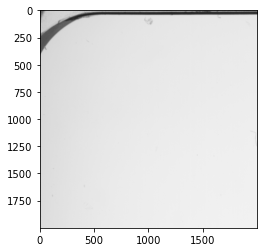

In [50]:
imgplt = plt.imread( infile )

print(imgplt.shape)

plt.imshow(imgplt) # displays image in the next output cell of the jupyter notebook